In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os,shutil

In [ ]:
#1. Loading Dataset

In [4]:
df = pd.read_csv(r"C:\Users\Laptop\Documents\Oasis Infobyte_Datasets\1_retail_sales_dataset_OASIS_Infobyte.csv")
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [6]:
df= df.drop_duplicates()

In [193]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age_Group,Date(Year),Date(Month),Date(Day),average_Price_per_Unit
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,25-34,2023,11,24,179.89
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,25-34,2023,02,27,179.89
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,45-54,2023,01,13,179.89
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,35-44,2023,05,21,179.89
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,25-34,2023,05,06,179.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,55 and above,2023,05,16,179.89
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,45-54,2023,11,17,179.89
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,18-24,2023,10,29,179.89
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,35-44,2023,12,05,179.89


In [195]:
#Descriptive Analysis

In [197]:
#average Quantity purchased by Product Category
average_quantity_by_product_catergory= df.groupby("Product Category")["Quantity"].mean().to_frame()
average_quantity_by_product_catergory

,Quantity
Product Category,
Beauty,2.511401
Clothing,2.547009
Electronics,2.482456


In [199]:
#ranked amount spent on each products category
Total_Amount_by_product_catergory= df.groupby("Product Category")["Total Amount"].sum().to_frame()
Total_Amount_by_product_catergory
ranked_product_category_by_amount=Total_Amount_by_product_catergory.sort_values("Total Amount",ascending=False)
ranked_product_category_by_amount

,Total Amount
Product Category,
Electronics,156905
Clothing,155580
Beauty,143515


In [201]:
#Descriptive Analysis / Customer and products Analysis

In [203]:
#average Total Amount Of  Products by Product Category
avergae_Total_Amount_of_products_purchased_by_product_category=df.groupby("Product Category")["Total Amount"].mean().to_frame()
avergae_Total_Amount_of_products_purchased_by_product_category
#ranked Product Category by average Total Amount Of  Products purchased
ranked_Product_Category_by_average_Total_Amount=avergae_Total_Amount_of_products_purchased_by_product_category.sort_values("Total Amount",ascending= False)
ranked_Product_Category_by_average_Total_Amount

,Total Amount
Product Category,
Beauty,467.475570
Electronics,458.786550
Clothing,443.247863


In [205]:
#top 10 customers who purchased the most quantity of products
ranked_customer_by_quantity_purchased= df.sort_values("Quantity",ascending= True)["Customer ID"].head(10).to_frame()
ranked_customer_by_quantity_purchased

,Customer ID
393,CUST394
378,CUST379
377,CUST378
900,CUST901
375,CUST376
374,CUST375
370,CUST371
901,CUST902
366,CUST367
364,CUST365


In [207]:
#top 10 customers by amount spent
ranked_customer_by_amount_spent = df.sort_values("Total Amount",ascending= True)["Customer ID"].head(10).to_frame()
ranked_customer_by_amount_spent

,Customer ID
422,CUST423
241,CUST242
235,CUST236
231,CUST232
906,CUST907
763,CUST764
467,CUST468
954,CUST955
229,CUST230
951,CUST952


In [209]:
#data spread("Standard deviation")
total_amount_spent_by_customer_2_= df.groupby("Customer ID")["Total Amount"].sum()
stanadrd_deviation_of_amount_purchased_by_customer= total_amount_spent_by_customer_2_.std()
stanadrd_deviation_of_amount_purchased_by_customer

559.997631555123

In [79]:
#Gender who purchased the most quantity of products purchased
sum_of_quantity_purchased_by_gender = df.groupby("Gender")["Quantity"].sum().to_frame()
sum_of_quantity_purchased_by_gender

,Quantity
Gender,
Female,1298
Male,1216


In [85]:
#Gender who spent the most
total_amount_spent_by_gender= df.groupby("Gender")["Total Amount"].sum().to_frame()
total_amount_spent_by_gender

,Total Amount
Gender,
Female,232840
Male,223160


In [77]:
df["Age_Group"] = pd.cut(df["Age"],bins=[18,25,35,45,55,float('inf')], 
                         labels=["18-24","25-34","35-44","45-54","55 and above"],
                         include_lowest=True)
df["Age_Group"]

0             25-34
1             25-34
2             45-54
3             35-44
4             25-34
           ...     
995    55 and above
996           45-54
997           18-24
998           35-44
999           45-54
Name: Age_Group, Length: 1000, dtype: category
Categories (5, object): ['18-24' < '25-34' < '35-44' < '45-54' < '55 and above']

In [123]:
#ranking age group by who purchased the most quantity
sum_of_quantity_purchased_by_age_group = df.groupby("Age_Group")["Quantity"].sum().head().to_frame()
sum_of_quantity_purchased_by_age_group.sort_values("Quantity",ascending = False)

C:\Users\Laptop\AppData\Local\Temp\ipykernel_1564\3101802217.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_of_quantity_purchased_by_age_group = df.groupby("Age_Group")["Quantity"].sum().head().to_frame()


,Quantity
Age_Group,
45-54,588
25-34,540
35-44,506
55 and above,468
18-24,412


In [211]:
#ranking age group by Total Amount Spent
total_amount_spent_by_age_group = df.groupby("Age_Group")["Total Amount"].sum().head().to_frame()
total_amount_spent_by_age_group.sort_values("Total Amount",ascending = False)

C:\Users\Laptop\AppData\Local\Temp\ipykernel_1564\4079810598.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_amount_spent_by_age_group = df.groupby("Age_Group")["Total Amount"].sum().head().to_frame()


,Total Amount
Age_Group,
45-54,100690
25-34,98480
35-44,91870
18-24,84550
55 and above,80410


In [219]:
total_quantity_by_product_catergory_age_group= df.groupby(["Product Category","Age_Group"])["Quantity"].sum().to_frame()
total_quantity_by_product_catergory_age_group

C:\Users\Laptop\AppData\Local\Temp\ipykernel_1564\2490067377.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_quantity_by_product_catergory_age_group= df.groupby(["Product Category","Age_Group"])["Quantity"].sum().to_frame()


Quantity
Product Category Age_Group             
Beauty           18-24              152
                 25-34              177
                 35-44              135
                 45-54              180
                 55 and above       127
Clothing         18-24              129
                 25-34              189
                 35-44              202
                 45-54              199
                 55 and above       175
Electronics      18-24              131
                 25-34              174
                 35-44              169
                 45-54              209
                 55 and above       166

In [ ]:
#Time series analysis

In [95]:
df[["Date(Year)","Date(Month)","Date(Day)"]]= df["Date"].str.split("-",expand=True)
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age_Group,Date(Year),Date(Month),Date(Day)
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,25-34,2023,11,24
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,25-34,2023,02,27
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,45-54,2023,01,13
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,35-44,2023,05,21
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,25-34,2023,05,06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,55 and above,2023,05,16
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,45-54,2023,11,17
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,18-24,2023,10,29
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,35-44,2023,12,05


In [101]:
#ranking months by quantity purchased
sum_of_quantity_purchased_by_month = df.groupby("Date(Month)")["Quantity"].sum().head(12).to_frame()
sum_of_quantity_purchased_by_month
ranked_month_by_sum_of_quantity_purchsed=sum_of_quantity_purchased_by_month.sort_values("Quantity",ascending= False)
ranked_month_by_sum_of_quantity_purchsed

,Quantity
Date(Month),
05,259
10,252
08,227
02,214
04,214
12,207
11,205
01,199
06,197


In [107]:
#ranking months by Total Amount spent
total_amount_spent_by_month = df.groupby("Date(Month)")["Total Amount"].sum().head(12).to_frame()
total_amount_spent_by_month
ranked_month_by_total_amount_spent=total_amount_spent_by_month.sort_values("Total Amount",ascending= False)
ranked_month_by_total_amount_spent

,Total Amount
Date(Month),
05,53150
10,46580
12,44690
02,44060
01,36980
08,36960
06,36715
07,35465
11,34920


In [117]:
#quantity purchased by average price per unit
quantity_purchased_by_average_price_per_unit= df.groupby("Quantity")["Price per Unit"].mean().to_frame()
quantity_purchased_by_average_price_per_unit
ranked_quantity_purchased_by_average_price_per_unit= quantity_purchased_by_average_price_per_unit.sort_values("Price per Unit",ascending=False)
ranked_quantity_purchased_by_average_price_per_unit

,Price per Unit
Quantity,
3,199.564315
1,177.094862
4,176.673004
2,166.769547


In [ ]:
#Data visualization

<Axes: title={'center': 'sum_of_quantity_purchased_by_gender'}, ylabel='Quantity'>

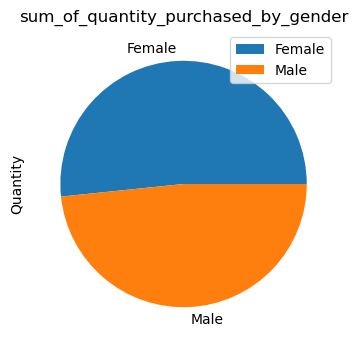

In [145]:
sum_of_quantity_purchased_by_gender.plot(kind="pie",y="Quantity",title="sum_of_quantity_purchased_by_gender",figsize=(6,4))

<Axes: title={'center': 'total_amount_spent_by_gender'}, ylabel='Total Amount'>

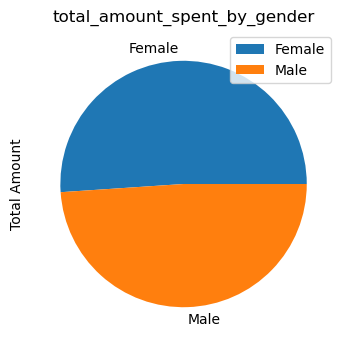

In [147]:
total_amount_spent_by_gender.plot(kind="pie",y= "Total Amount",title="total_amount_spent_by_gender",figsize=(6,4))

<Axes: title={'center': 'total_amount_spent_by_age_group'}, ylabel='Total Amount'>

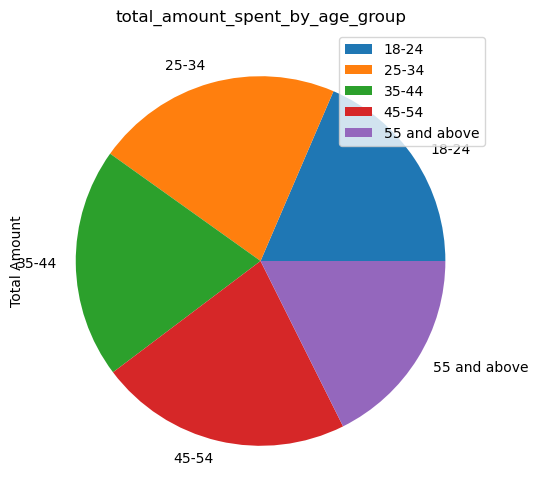

In [137]:
total_amount_spent_by_age_group.plot(kind="pie",y="Total Amount",title="total_amount_spent_by_age_group",figsize=(8,6))

<Axes: title={'center': 'ranked_month_by_sum_of_quantity_purchsed'}, xlabel='Date(Month)', ylabel='Quantity'>

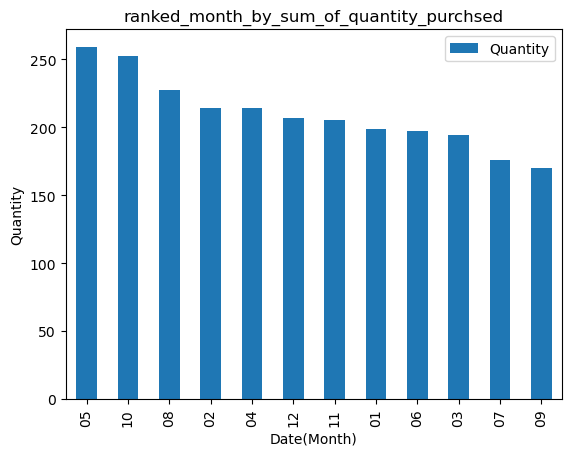

In [135]:
ranked_month_by_sum_of_quantity_purchsed.plot(kind="bar",xlabel="Date(Month)",ylabel="Quantity",title="ranked_month_by_sum_of_quantity_purchsed")

<Axes: xlabel='Date(Month)', ylabel='Total Amount'>

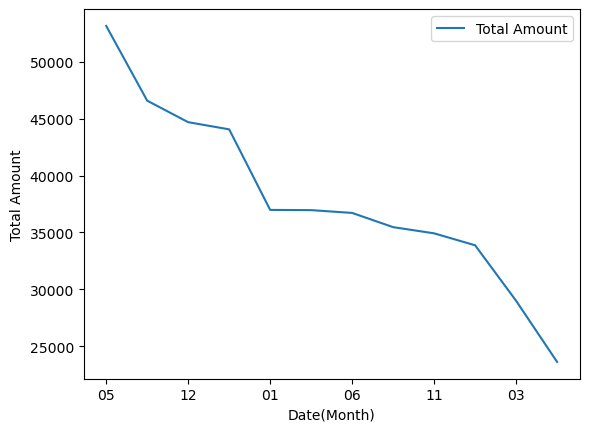

In [165]:
ranked_month_by_total_amount_spent.plot(kind="line",xlabel="Date(Month)",ylabel="Total Amount")

<Axes: title={'center': 'ranked_month_by_sum_of_quantity_purchsed'}, xlabel='Product Category,Age_Group'>

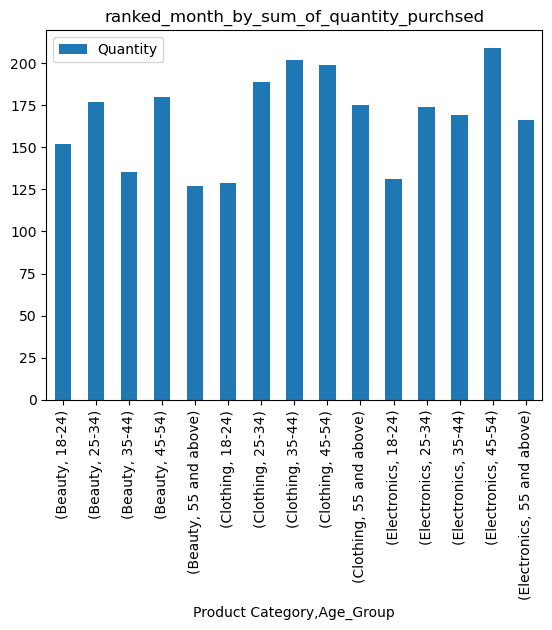

In [223]:
total_quantity_by_product_catergory_age_group.plot(kind="bar",title="ranked_month_by_sum_of_quantity_purchsed")

In [169]:
numerical_columns= df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']]
numerical_columns

,Age,Quantity,Price per Unit,Total Amount
0,34,3,50,150
1,26,2,500,1000
2,50,1,30,30
3,37,1,500,500
4,30,2,50,100
...,...,...,...,...
995,62,1,50,50
996,52,3,30,90
997,23,4,25,100
998,36,3,50,150


In [ ]:
#Heat maps correlation and relationships

C:\Users\Laptop\AppData\Local\Temp\ipykernel_1564\2958483065.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sns.heatmap(df.pivot_table(index='Age_Group', values='Total Amount', aggfunc='sum'), annot=True, cmap='Blues')


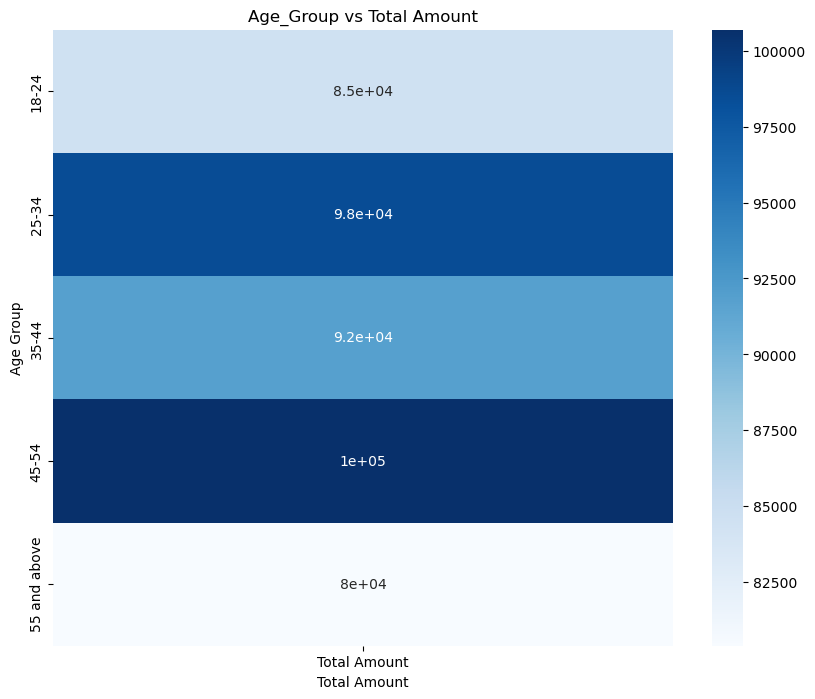

In [185]:
#Relationship between Age group and Total AMount
plt.figure(figsize=(10,8))
sns.heatmap(df.pivot_table(index='Age_Group', values='Total Amount', aggfunc='sum'), annot=True, cmap='Blues')
plt.title('Age_Group vs Total Amount')
plt.xlabel('Total Amount')
plt.ylabel('Age Group')
plt.show()

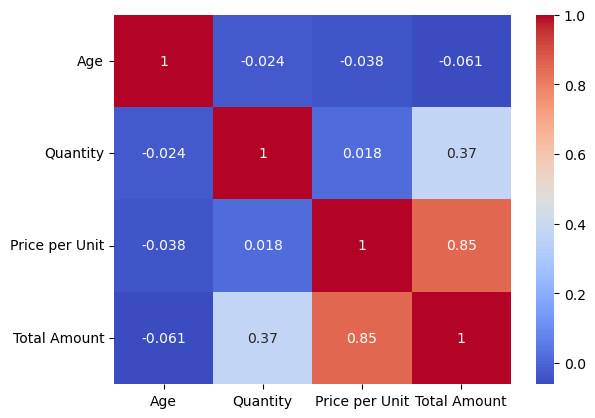

<Figure size 1000x700 with 0 Axes>

In [179]:
#correlation of numeric columns with themselves
sns.heatmap(numerical_columns.corr(),annot=True,cmap="coolwarm")
plt.figure(figsize=(10,7))
plt.show()

In [ ]:
#recommendations

In [ ]:
"""1.Optimize Product Placement
- Finding: The EDA revealed a strong correlation between product categories and sales.
- Recommendation: Place top-selling product categories in prominent locations within stores to increase visibility and drive sales.
2.  Targeted Marketing Campaigns

- Finding: The EDA showed that certain age groups are more likely to purchase specific product categories.
- Recommendation: Launch targeted marketing campaigns to reach these age groups and promote relevant product categories.

3.  Monthly Promotions

- Finding: The EDA revealed monthly fluctuations in sales.
- Recommendation: Offer monthly promotions and discounts to capitalize on peak sales periods.

"""
